# Importing Libraries

In [296]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Importing Dataset


Diabetes dataset

Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

  :Attributes:
  
    :Age:    
    :Sex:    
    :Body mass index:    
    :Average blood pressure:    
    :S1:    
    :S2:    
    :S3:    
    :S4:    
    :S5:    
    :S6:


In [297]:
diabetes = datasets.load_diabetes() # load data
diabetes.feature_names # column names


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# Data Split

In [298]:
# Sperate train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.2, random_state = 0)

# Model Development


In [299]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 


In [300]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [301]:
model.coef_  # Gets the coefficients of the regression model

array([ -35.55683674, -243.1692265 ,  562.75404632,  305.47203008,
       -662.78772128,  324.27527477,   24.78193291,  170.33056502,
        731.67810787,   43.02846824])

In [302]:
model.intercept_  # Gets the intercept of the regression model

152.53813351954059

# Prediction

In [303]:
y_predict = model.predict(X_test)
print "R_squared for test set = ", r2_score(y_test, y_predict)

R_squared for test set =  0.332222032691


# Visualization

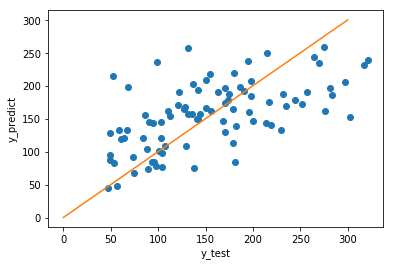

In [304]:
# plot the prediction and actual data

y_predict = model.predict(X_test)

plt.xlabel("y_test")
plt.ylabel("y_predict")

plt.plot(y_test, y_predict, "o")

# plot a line: IF the prediction was perfect the data should have fallen on the line

x = np.linspace(0,300)
plt.plot(x, x)
plt.show()


## Improving Predictions 

Feature Engineering means identfying a set of infleuntial features that can best describe a relationship between those features

and the target variable

**Try to see if you can find a better subset of features for which you can build a more accurate regression prediction model**

Lets also print out the accuracy measure on the training set


In [305]:
y_predict_train = model.predict(X_train)
print "R_squared for training set = ", r2_score(y_train, y_predict_train)
print
print "R_squared for test set = ", r2_score(y_test, y_predict)

R_squared for training set =  0.553928535742

R_squared for test set =  0.332222032691


It seems the model may suffer from **overfitting**. So, **regularization** may help. 

Lets create a table to keep the R_squared values for our reference

In [306]:
R_squares = pd.DataFrame()
R_squares["LR"] = [r2_score(y_train, y_predict_train), r2_score(y_test, y_predict)]

In [307]:
# Renaming row names to make more sense

R_squares.rename(index = {0: "Train", 1:"Test"}, inplace = True)

R_squares.head()

,LR
Train,0.553929
Test,0.332222


## Ridge Regression

Lets develop a Ridge Regression for the problem

In [308]:
from sklearn.linear_model import Ridge

In [309]:
my_Ridge_reg_model = Ridge(alpha = 0.45).fit(X_train, y_train)
# we need to play around with alpha values and find a good one

Lets make a prediction on test set

In [310]:
y_predict = my_Ridge_reg_model.predict(X_test)

In [311]:
r2_score(y_test, y_predict)

0.35718334800848062

Lets also make predictions on the training set

In [312]:
y_predict_train = my_Ridge_reg_model.predict(X_train)

In [313]:
r2_score(y_train, y_predict_train)

0.51742195314242556

In [314]:
R_squares["Ridge"] = [r2_score(y_train, y_predict_train), r2_score(y_test, y_predict)]

In [315]:
R_squares

,LR,Ridge
Train,0.553929,0.517422
Test,0.332222,0.357183


As shown here, the regualirzation in the Ridge regression has reduced the accuracy gap a little  bit

You can play with the penalty parameter **alpha** to see the effect of different level of regularization

## Lasso Regression

Lets develop another type of Regularized Regression model called the **Lasso Regression**

In [316]:
from sklearn.linear_model import Lasso

In [317]:
my_Lasso = Lasso(alpha = 0.17).fit(X_train, y_train)

# We can play around with the regularization  parameter alpha to find a good one


In [318]:
y_predict = my_Lasso.predict(X_test)

In [319]:
r2_score(y_test, y_predict)

0.34278596450262466

Lets also make predictions on the training set

In [320]:
y_predict_train = my_Lasso.predict(X_train)

In [321]:
r2_score(y_train, y_predict_train)

0.53633070377090419

In [322]:
R_squares["Lasso"] = [r2_score(y_train, y_predict_train), r2_score(y_test, y_predict)]

In [323]:
R_squares

,LR,Ridge,Lasso
Train,0.553929,0.517422,0.536331
Test,0.332222,0.357183,0.342786


## Feature Scaling (Normalization)

Lets use **MinMaxScaler** to **normalize** our data and then apply the Ridge regression the **scaled data**

In [324]:
# Lets import MinMaxScaler sklearn.preprocessing


#Lets now create an object of MinMaxScaler as scaler


Now lets **normalize** our data 

In [1]:
# Fit an scaler


# We dont scale the target variable



# We could combine these two into one single line
# X_train_scaled = scaler.fit_transform(X_train)


Now lets **re-apply** the **Regularized Regression methods** on the **scaled data**

### Ridge Regression on the Scaled Data

In [3]:
# Define and fit a Ridge model on the scaled data


# Make a prediction on scaled test data


In [4]:
# print out the r2-score



We can play around with **alpha** to find a **good tuning** for more accurate predictions

It seems that we have been able to slightly **imporve** the **accuracy** of the Ridge Regression **using feature normalization**

### Lasso Regression on the Scaled Data

Now, lets **re-apply** the **Lasso Regression** on the **scaled data**

In [5]:
# Define and fit a Lasso model on the scaled data


# Make a prediction on the scaled test data


# print out the r2_score for your prediction


We should **tune alpha** for more accuracy

It seems that feature normalization has slightly improved the accuracy of the Lasso Regression

## Polynomial Features

There might be a **non-linear relationship** between variables in data which we **cannot capture with a Linear Model**

Therefore, here we will **create new features** using **polynomial** combinations of previous features and then reapply

Regression Models on them. 

In [6]:
# Lets import PolynomialFeatures from sklearn.preprcosseing


#Create an object of PoynomialFeatures


# Lets create new features (variables)


#### Data Split to Training and Test sets

### Build another Ridge Regression on the new features

In [7]:


# You can play around to tune alpha

Make a prediction

Compute accurace

Lets compute the R Squared for training and test and save that in the R_squares table

## Polynomial Ridge on Scaled Data